# Gerontocracy

After hearing a crazy stat - that the US senate has never been older (on average) than it is today, I decided to pull that for a variety of legislative bodies and plot them to find just how geriatric our politics has become.

In [1]:
from bs4 import BeautifulSoup

In [2]:
import requests

In [3]:
import pandas as pd

In [4]:
import importlib
import wiki_utils
importlib.reload(wiki_utils)

<module 'wiki_utils' from '/Users/Daniel_Kats/prog/senator-age/wiki_utils.py'>

In [5]:
import os

In [11]:
import date_utils
importlib.reload(date_utils)

<module 'date_utils' from '/Users/Daniel_Kats/prog/senator-age/date_utils.py'>

## US Senators - Extract Data

In [6]:
if os.path.exists('data/us_senators/senators-with-ages.parquet'):
    us_sens = pd.read_parquet('data/us_senators/senators-with-ages.parquet')
else:
    url = 'https://en.wikipedia.org/wiki/List_of_current_United_States_senators'
    table = wiki_utils.extract_wikitable(url, id="senators")
    cols = wiki_utils.extract_wikitable_schema(table)
    rows = wiki_utils.extract_wikitable_content(table, cols)
    us_sens = pd.DataFrame(rows)

In [7]:
us_sens

,State,Image,Senator,Party - 1,Party - 2,Born,Occupation(s),Previousoffice(s),Assumed office,Term up,Residence,wiki_age,calculated_age
0,Alabama,,Richard Shelby,,Republican,"(1934-05-06) May 6, 1934 (age 86)",Lawyer,U.S. HouseAlabama Senate,"January 3, 1987",2022,Tuscaloosa[1],86,86
1,Alabama,,Doug Jones,,Democratic,"(1954-05-04) May 4, 1954 (age 66)",Lawyer,"Staff counsel, U.S. Senate Judiciary Committee...","January 3, 2018[d]",2020,Birmingham[1],66,66
2,Alaska,,Lisa Murkowski,,Republican,"(1957-05-22) May 22, 1957 (age 62)",Lawyer,Alaska House of Representatives,"December 20, 2002",2022,Anchorage[3],62,63
3,Alaska,,Dan Sullivan,,Republican,"(1964-11-13) November 13, 1964 (age 55)",U.S. Marine Corps officerLawyer,Alaska Attorney GeneralAssistant Secretary of ...,"January 3, 2015",2020,Anchorage[3],55,55
4,Arizona,,Kyrsten Sinema,,Democratic,"(1976-07-12) July 12, 1976 (age 43)",Social workerPolitical activistLawyerCollege p...,U.S. HouseArizona SenateArizona House of Repre...,"January 3, 2019",2024,Phoenix[4],43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,West Virginia,,Shelley Moore Capito,,Republican,"(1953-11-26) November 26, 1953 (age 66)","College career counselorDirector, state Board ...",U.S. HouseWest Virginia House of Delegates,"January 3, 2015",2020,Charleston,66,66
96,Wisconsin,,Ron Johnson,,Republican,"(1955-04-08) April 8, 1955 (age 65)",AccountantCorporate executive,None,"January 3, 2011",2022,Oshkosh,65,65
97,Wisconsin,,Tammy Baldwin,,Democratic,"(1962-02-11) February 11, 1962 (age 58)",Lawyer,"U.S. HouseWisconsin AssemblyDane County, Wisco...","January 3, 2013",2024,Madison,58,58
98,Wyoming,,Mike Enzi,,Republican,"(1944-02-01) February 1, 1944 (age 76)",Nonprofit organization executiveAccountantCEOM...,Wyoming House of RepresentativesWyoming Senate,"January 3, 1997",2020,Gillette,76,76


In [8]:
us_sens.shape

(100, 13)

In [9]:
us_sens['Party - 2'].unique()

array(['Republican', 'Democratic', 'Independent[a]'], dtype=object)

In [10]:
us_sens['Born']

0           (1934-05-06) May 6, 1934 (age 86)
1           (1954-05-04) May 4, 1954 (age 66)
2          (1957-05-22) May 22, 1957 (age 62)
3     (1964-11-13) November 13, 1964 (age 55)
4         (1976-07-12) July 12, 1976 (age 43)
                       ...                   
95    (1953-11-26) November 26, 1953 (age 66)
96        (1955-04-08) April 8, 1955 (age 65)
97    (1962-02-11) February 11, 1962 (age 58)
98     (1944-02-01) February 1, 1944 (age 76)
99        (1952-07-21) July 21, 1952 (age 67)
Name: Born, Length: 100, dtype: object

In [13]:
if 'wiki_age' not in us_sens:
    us_sens['wiki_age'] = us_sens['Born'].apply(date_utils.extract_age_from_wikitable)

In [14]:
if 'calculated_age' not in us_sens:
    us_sens['calculated_age'] = us_sens['Born'].apply(date_utils.calculate_age_from_birthday_wikitable)

In [15]:
us_sens[us_sens['calculated_age'] != us_sens['wiki_age']]

,State,Image,Senator,Party - 1,Party - 2,Born,Occupation(s),Previousoffice(s),Assumed office,Term up,Residence,wiki_age,calculated_age
2,Alaska,,Lisa Murkowski,,Republican,"(1957-05-22) May 22, 1957 (age 62)",Lawyer,Alaska House of Representatives,"December 20, 2002",2022,Anchorage[3],62,63
44,Minnesota,,Amy Klobuchar,,Democratic,"(1960-05-25) May 25, 1960 (age 59)",Lawyer,"Hennepin County, Minnesota County Attorney","January 3, 2007",2024,Minneapolis[30],59,60


## age histogram, finally

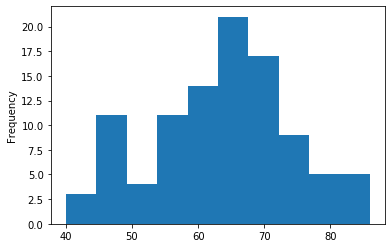

In [16]:
# this shows that the wikipedia age is actually edited-in rather than dynamically calculated

us_sens.calculated_age.plot.hist()

In [17]:
import graph_utils

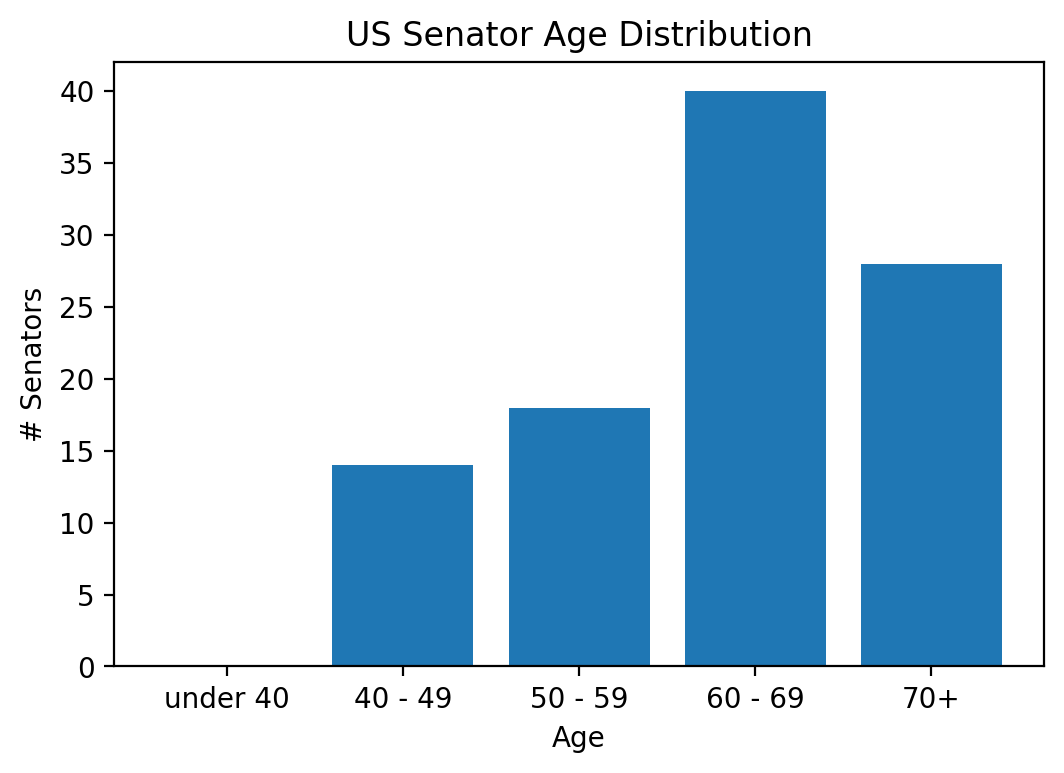

In [18]:
hist_data_us = graph_utils.graph_age_histogram(us_sens, title='US Senator Age Distribution',
                   age_col='calculated_age', y_axis_label='# Senators')

## extract ages of Canadian senators

By law, Canadian senators cannot be older than 75.

In [19]:
if os.path.exists('data/ca_senators/senators.parquet'):
    can_senators = pd.read_parquet('data/ca_senators/senators.parquet')
else:
    url = 'https://en.wikipedia.org/wiki/List_of_current_senators_of_Canada'
    table = wiki_utils.extract_wikitable(url)
    can_senators = wiki_utils.wikitable_to_dataframe(table)


In [20]:
can_senators

,[8],Name,Senate political affiliation,Province (Division)[a],Date appointed,Appointed on the advice of - 1,Appointed on the advice of - 2,Mandatory retirement date,Titles and notes
0,,Margaret Dawn Anderson,Independent Senators Group,Northwest Territories,"December 12, 2018",,"Trudeau, J.","April 14, 2042",
1,,Salma Ataullahjan,Conservative,Ontario,"July 9, 2010",,Harper,"April 29, 2027",
2,,Denise Batters,Conservative,Saskatchewan,"January 25, 2013",,Harper,"June 18, 2045",
3,,Diane Bellemare,Independent Senators Group,Quebec (Alma),"September 6, 2012",,Harper,"October 13, 2024",Legislative Deputy to Government Representativ...
4,,Wanda Thomas Bernard,Independent Senators Group,Nova Scotia,"November 10, 2016",,"Trudeau, J.","August 1, 2028",
...,...,...,...,...,...,...,...,...,...
91,,Pamela Wallin,Canadian Senators Group,Saskatchewan,"January 2, 2009",,Harper,"April 10, 2028",
92,,David Wells,Conservative,Newfoundland and Labrador,"January 25, 2013",,Harper,"February 28, 2037",
93,,Howard Wetston,Independent Senators Group,Ontario,"November 10, 2016",,"Trudeau, J.","June 3, 2022",
94,,Vernon White,Canadian Senators Group,Ontario,"February 20, 2012",,Harper,"February 21, 2034","Upon his appointment, Senator White said that ..."


In [21]:
can_senators['estimated_age'] = can_senators['Mandatory retirement date'].apply(date_utils.age_from_mandatory_retirement_date)

### Canadian Senator Histogram

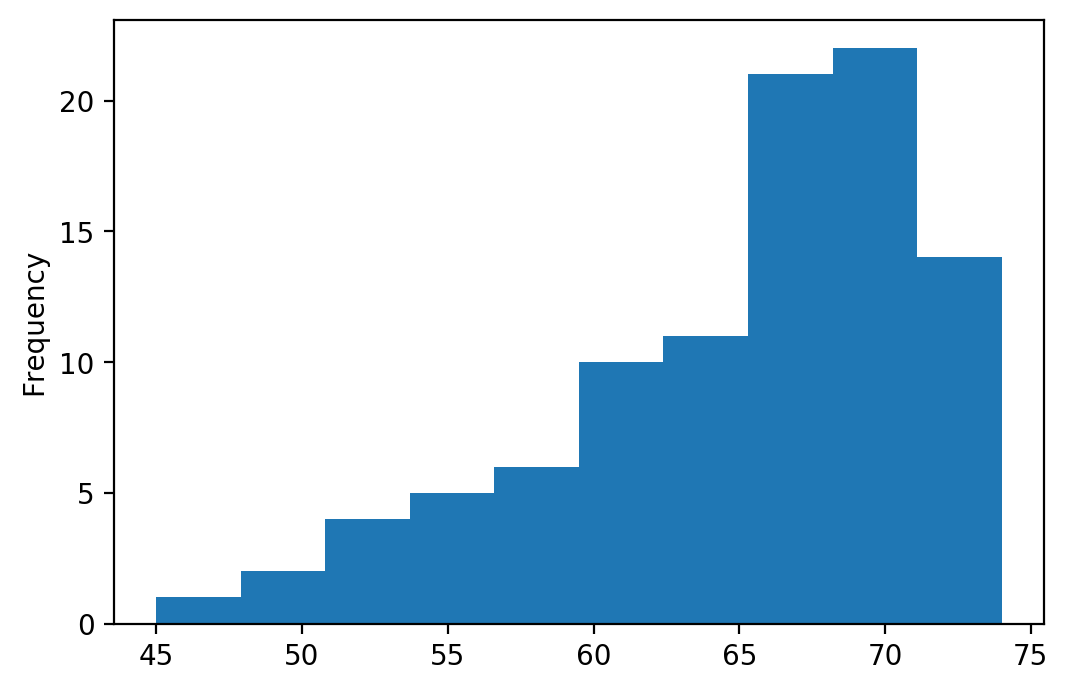

In [22]:
can_senators.estimated_age.plot.hist()

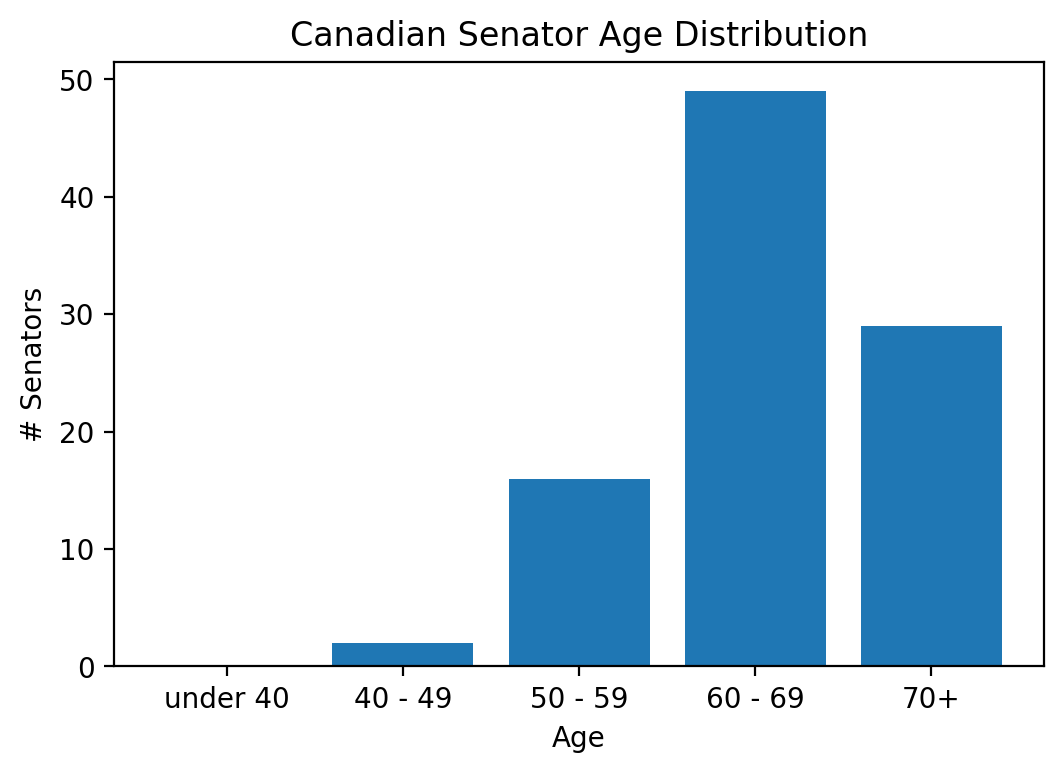

In [23]:
hist_data_ca = graph_utils.graph_age_histogram(can_senators,
                               title='Canadian Senator Age Distribution',
                               age_col='estimated_age',
                               y_axis_label='# Senators')

### Histogram Canada vs USA

In [24]:
import seaborn as sns

In [25]:
for row in hist_data_ca:
    row['country'] = 'Canada'
    
hist_data_ca

[{'age_range': 'under 40', 'num_senators': 0, 'country': 'Canada'},
 {'age_range': '40 - 49', 'num_senators': 2, 'country': 'Canada'},
 {'age_range': '50 - 59', 'num_senators': 16, 'country': 'Canada'},
 {'age_range': '60 - 69', 'num_senators': 49, 'country': 'Canada'},
 {'age_range': '70+', 'num_senators': 29, 'country': 'Canada'}]

In [26]:
for row in hist_data_us:
    row['country'] = 'USA'
    
hist_data_us

[{'age_range': 'under 40', 'num_senators': 0, 'country': 'USA'},
 {'age_range': '40 - 49', 'num_senators': 14, 'country': 'USA'},
 {'age_range': '50 - 59', 'num_senators': 18, 'country': 'USA'},
 {'age_range': '60 - 69', 'num_senators': 40, 'country': 'USA'},
 {'age_range': '70+', 'num_senators': 28, 'country': 'USA'}]

In [27]:
hist_rows = hist_data_ca + hist_data_us
hist_rows

[{'age_range': 'under 40', 'num_senators': 0, 'country': 'Canada'},
 {'age_range': '40 - 49', 'num_senators': 2, 'country': 'Canada'},
 {'age_range': '50 - 59', 'num_senators': 16, 'country': 'Canada'},
 {'age_range': '60 - 69', 'num_senators': 49, 'country': 'Canada'},
 {'age_range': '70+', 'num_senators': 29, 'country': 'Canada'},
 {'age_range': 'under 40', 'num_senators': 0, 'country': 'USA'},
 {'age_range': '40 - 49', 'num_senators': 14, 'country': 'USA'},
 {'age_range': '50 - 59', 'num_senators': 18, 'country': 'USA'},
 {'age_range': '60 - 69', 'num_senators': 40, 'country': 'USA'},
 {'age_range': '70+', 'num_senators': 28, 'country': 'USA'}]

In [28]:
hist_data = pd.DataFrame(hist_rows)
hist_data

,age_range,num_senators,country
0,under 40,0,Canada
1,40 - 49,2,Canada
2,50 - 59,16,Canada
3,60 - 69,49,Canada
4,70+,29,Canada
5,under 40,0,USA
6,40 - 49,14,USA
7,50 - 59,18,USA
8,60 - 69,40,USA
9,70+,28,USA


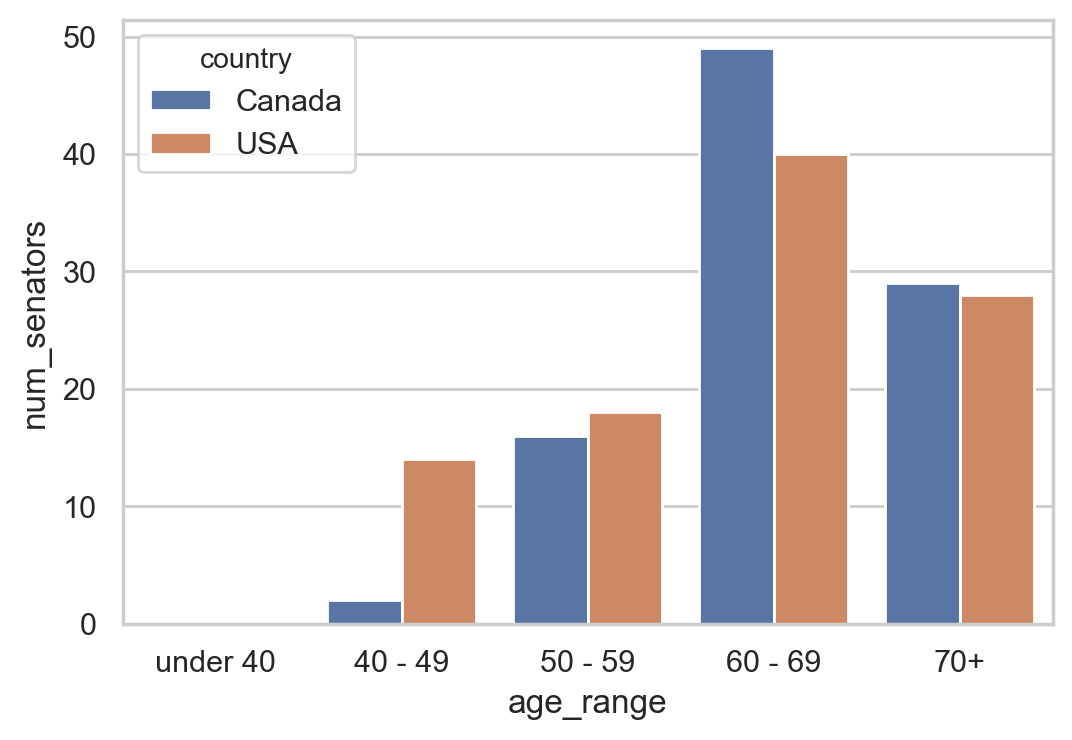

In [29]:
sns.set(style='whitegrid')
ax = sns.barplot(
    x='age_range',
    y='num_senators',
    hue='country',
    data=hist_data
)

## US House of Reps

In [34]:
if os.path.exists('data/us_reps/us_reps.parquet'):
    reps = pd.read_parquet('data/us_reps/us_reps.parquet')
else:
    url = 'https://en.wikipedia.org/wiki/List_of_current_members_of_the_United_States_House_of_Representatives'
    reps_table = wiki_utils.extract_wikitable(url, id='votingmembers')
    reps = wiki_utils.wikitable_to_dataframe(reps_table)

In [35]:
reps.shape

(435, 9)

In [36]:
reps

,District,Member,Party - 1,Party - 2,Prior experience,Education,Assumed office,Residence,Born
0,Alabama 1,Bradley Byrne,,Republican,Alabama SenateAlabama State Board of Education,Duke University (BA)University of Alabama (JD),2014 (Special),Fairhope,1955
1,Alabama 2,Martha Roby,,Republican,"Montgomery, Alabama City Council",New York University (BM)Samford University (JD),2011,Montgomery,1976
2,Alabama 3,Mike Rogers,,Republican,"Calhoun County, Alabama CommissionerAlabama Ho...","Jacksonville State University (BA, MPA)Birming...",2003,Saks,1958
3,Alabama 4,Robert Aderholt,,Republican,"Haleyville, Alabama Municipal Judge",University of North AlabamaBirmingham–Southern...,1997,Haleyville,1965
4,Alabama 5,Mo Brooks,,Republican,Alabama House of RepresentativesMadison County...,Duke University (BA)University of Alabama (JD),2011,Huntsville,1954
...,...,...,...,...,...,...,...,...,...
430,Wisconsin 5,Jim Sensenbrenner,,Republican,Wisconsin State SenateWisconsin State Assembly,Stanford University (BA)University of Wisconsi...,1979,Menomonee Falls,1943
431,Wisconsin 6,Glenn Grothman,,Republican,Wisconsin SenateWisconsin State Assembly,"University of Wisconsin–Madison (BA, JD)",2015,Campbellsport,1955
432,Wisconsin 7,Tom Tiffany,,Republican,Wisconsin SenateWisconsin State Assembly,University of Wisconsin–River Falls (BS),2020 (Special),Minocqua,1957
433,Wisconsin 8,Mike Gallagher,,Republican,Political advisorU.S. Marine Corps,Princeton University (BA)National Intelligence...,2017,Green Bay,1984


In [37]:
reps[pd.isna(pd.to_numeric(reps.Born))]

,District,Member,Party - 1,Party - 2,Prior experience,Education,Assumed office,Residence,Born
70,California 50,Vacant,,,,,,,
283,New York 27,Vacant,,,,,,,
294,North Carolina 11,Vacant,,,,,,,
364,Texas 4,Vacant,,,,,,,


In [38]:
vacant = reps[reps.Member == 'Vacant']
reps_not_vacant = reps.drop(vacant.index)

In [39]:
reps.shape

(435, 9)

In [40]:
reps_not_vacant.shape

(431, 9)

The "Born" column *only* has the year

In [41]:
reps_not_vacant['Born'] = pd.to_numeric(reps_not_vacant['Born'])

In [42]:
reps_not_vacant.dtypes

District            object
Member              object
Party - 1           object
Party - 2           object
Prior experience    object
Education           object
Assumed office      object
Residence           object
Born                 int64
dtype: object

In [44]:
reps_not_vacant['approx_age'] = reps_not_vacant['Born'].apply(date_utils.calculate_age_from_year)

### plot it!

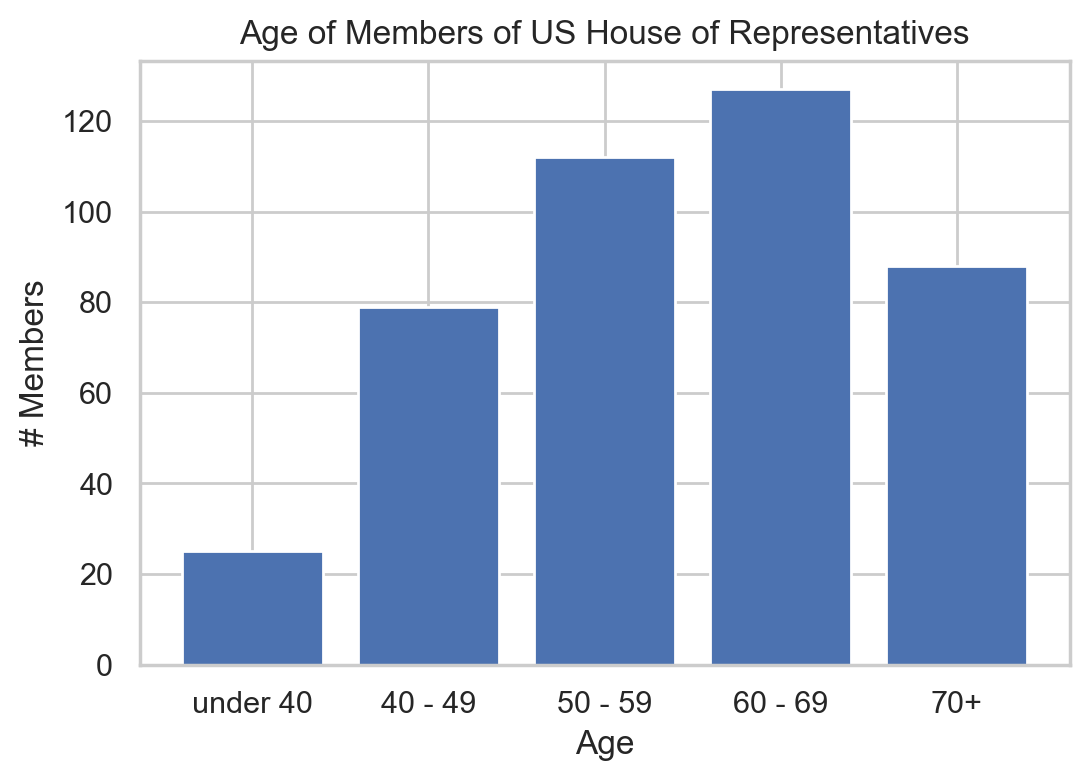

In [45]:
hist_data_us_reps = graph_utils.graph_age_histogram(reps_not_vacant,
                                title='Age of Members of US House of Representatives',
                                age_col='approx_age',
                               y_axis_label='# Members')

## Canadian Parliament

The Wikipedia article splits the members by province, so have to adapt our method to extract multiple tables

In [55]:
if os.path.exists('data/ca_reps/ca_reps_with_age_from_2.parquet'):
    master_df = pd.read_parquet('data/ca_reps/ca_reps_with_age_from_2.parquet')
else:
    url = 'https://en.wikipedia.org/wiki/List_of_House_members_of_the_43rd_Parliament_of_Canada'
    canadian_tables = wiki_utils.extract_all_wikitables(url)

The last table is a summary table, therefore I will ignore it. Every other table represents a province or region.

In [47]:
if not os.path.exists('data/ca_reps/ca_reps_with_age_from_2.parquet'):
    frames = []
    for table in canadian_tables[:-1]:
        frames.append(wiki_utils.wikitable_to_dataframe(table))
    frames[0]

### extracting age

Oh tragedy of tragedies, the ages are not present on these pages. Perhaps I can fetch them from the members' individual Wikipedia pages

In [48]:
if not os.path.exists('data/ca_reps/ca_reps_with_age_from_2.parquet'):
    frames = []
    for table in canadian_tables[:-1]:
        cols = wiki_utils.extract_wikitable_schema(table)
        rows = wiki_utils.extract_wikitable_content_with_links(table, cols)
        df = pd.DataFrame(rows)
        frames.append(df)
    frames[0]

In [49]:
if not os.path.exists('data/ca_reps/ca_reps_with_age_from_2.parquet'):
    for frame in frames:
        frame['age'] = frame['Name_link'].apply(wiki_utils.read_age_from_wikipedia_page)

In [52]:
# combine the frames

def combine_frames(frames):
    master_df = pd.DataFrame()
    for frame in frames:
        master_df = master_df.append(frame)
    return master_df.reset_index(drop=True)

if not os.path.exists('data/ca_reps/ca_reps_with_age_from_2.parquet'):
    master_df = combine_frames(frames)
    # save these
    master_df.to_parquet('data/ca_reps/ca_reps_with_age_from_summary.parquet')
    master_df

Using this method, we have found age for *some* members but not all of them

In [57]:
master_df[pd.isna(master_df['age'])].shape

(110, 9)

In [59]:
missing_members = master_df[pd.isna(master_df['age'])]
missing_members.shape

(110, 9)

### Read dates of birth from Wikipedia Infobox

The previous library only handled summaries. This tool handles Wikipedia infoboxes as well.
Use this tool to try to read the dates of politicians from their wikipedia infoboxes

In [63]:
importlib.reload(wiki_utils)

<module 'wiki_utils' from '/Users/Daniel_Kats/prog/senator-age/wiki_utils.py'>

In [64]:
birthdays = missing_members.Name_link.apply(wiki_utils.extract_birth_date_from_infobox)

ERROR:root:No birth_date key specified in infobox for Greg McLean (politician)


{'alma_mater': '[[University of Alberta]]',
 'caption': 'McLean in Calgary in 2019',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Greg McLean in Calgary - 2019 (48231547782) (cropped).jpg',
 'name': 'Greg McLean',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Kent Hehr]]',
 'profession': '[[Member of Parliament]]',
 'residence': '[[Calgary]], [[Alberta]]',
 'riding': '[[Calgary Centre]]',
 'spouse': 'Ruth',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Jasraj Hallan


{'birth_place': '[[Dubai]], [[United Arab Emirates]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'JasrajSinghHallan.jpg',
 'imagesize': '200px',
 'name': 'Jasraj Singh Hallan',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Deepak Obhrai]]',
 'residence': '[[Calgary]], [[Alberta]]',
 'riding': '[[Calgary Forest Lawn]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Gerald Soroka


{'birth_place': '[[Evansburg, Alberta]], Canada',
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'imagesize': '200px',
 'name': 'Gerald Soroka',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Jim Eglinski]]',
 'riding': '[[Yellowhead (electoral district)|Yellowhead]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Alistair MacGregor


{'alma_mater': '[[University of Victoria]]<br />[[Royal Roads University]]',
 'birth_place': '[[Victoria, British Columbia]]',
 'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Alistair MacGregor',
 'parliament': 'Canadian',
 'party': '[[New Democratic Party]]',
 'predecessor': '[[Jean Crowder]]',
 'profession': 'Executive Assistant',
 'residence': '[[Duncan, British Columbia]]',
 'riding': '[[Cowichan—Malahat—Langford]]',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Rob Morrison (politician)


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Rob Morrison',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Wayne Stetski]]',
 'profession': 'public servant',
 'residence': '[[Creston, British Columbia]]',
 'riding': '[[Kootenay—Columbia]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Taylor Bachrach


{'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Taylor Bachrach',
 'parliament': 'Canadian',
 'party': '[[New Democratic Party]]',
 'predecessor': '[[Nathan Cullen]]',
 'riding': '[[Skeena—Bulkley Valley]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Kenny Chiu


{'birth_place': '[[Hong Kong]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Kenny Chiu (cropped).jpg',
 'imagesize': '200px',
 'name': 'Kenny Chiu',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Joe Peschisolido]]',
 'profession': 'Software engineer',
 'riding': '[[Steveston—Richmond East]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for René Arseneault


{'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'imagesize': '200px',
 'name': 'René Arseneault',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Bernard Valcourt]]',
 'profession': 'Attorney',
 'riding': '[[Madawaska—Restigouche]]',
 'spouse': 'Michèle Pelletier',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Ginette Petitpas Taylor


{'alma_mater': '[[Université de Moncton]]',
 'birth_place': '[[Dieppe, New Brunswick]], Canada',
 'honorific-prefix': '[[The Honourable]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|PC|MP|size|=|100%}}',
 'minister3': '[[Bill Morneau]]',
 'name': 'Ginette Petitpas Taylor',
 'office': '[[Party Whip (Canada)|Deputy Government Whip]]',
 'office2': '[[Minister of Health (Canada)|Minister of Health]]',
 'office3': '[[Parliamentary Secretary]] to the [[Minister of Finance '
            '(Canada)|Minister of Finance]]',
 'parliament4': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Linda Lapointe]]',
 'predecessor1': '[[Dave MacKenzie (politician)|Dave MacKenzie]]',
 'predecessor2': '[[Jane Philpott]]',
 'predecessor3': '[[François-Philippe Champagne]]',
 'predecessor4': '[[Robert Goguen]]',
 'primeminister': '[[Justin Trudeau]]',
 'primeminister1': '[[Justin Trudeau]]',
 'primeminister2': '[[Justin Trudeau]]',
 'riding4': '[[Moncton—Riverview—Dieppe

ERROR:root:No birth_date key specified in infobox for John Brassard


{'birth_place': '[[Montreal]], [[Quebec]]',
 'caption': 'Brassard in 2019',
 'image': 'John Brassard - 2019 (47899551081) (cropped).jpg',
 'leader': '[[Andrew Scheer]]',
 'leader2': '[[Rona Ambrose]]<br />[[Andrew Scheer]]',
 'name': 'John Brassard',
 'office': '[[Party Whip (Canada)|Deputy Opposition Whip]]',
 'office2': '[[Minister of Veterans Affairs (Canada)|Official Opposition '
            'Critic for Veterans Affairs]]',
 'office3': '[[Barrie City Council]]lor',
 'parliament1': 'Canadian',
 'predecessor': '[[Dave MacKenzie (politician)|Dave MacKenzie]]',
 'predecessor1': "''Riding established''",
 'predecessor2': '[[Alupa Clarke]]',
 'predecessor3': 'Steve Trotter',
 'riding1': '[[Barrie—Innisfil]]',
 'successor2': '[[Steven Blaney]]',
 'successor3': 'Andrew Prince',
 'term_end2': 'August 29, 2017',
 'term_end3': 'November 2, 2015',
 'term_start': 'August 29, 2017',
 'term_start1': 'October 19, 2015',
 'term_start2': 'October 16, 2016',
 'term_start3': 'November 13, 2006'}


ERROR:root:No birth_date key specified in infobox for Julie Dzerowicz


{'alma_mater': '[[McGill University]]<br />[[University of British Columbia]]',
 'birth_place': '[[Toronto|Toronto, Ontario]], Canada',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Julie Dzerowicz.jpg',
 'imagesize': '200px',
 'name': 'Julie Dzerowicz',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Andrew Cash]]',
 'residence': '[[Davenport, Toronto|Davenport, Toronto, Ontario]]',
 'riding': '[[Davenport (electoral district)|Davenport]]',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Erin O'Toole


{'allegiance': 'Canada',
 'alma_mater': '[[Royal Military College of Canada|Royal Military College]] '
               '([[Bachelor of Arts|BA]])<br />[[Dalhousie University]] '
               '([[Bachelor of Laws|LLB]])',
 'birth_name': "Erin Michael O'Toole",
 'birth_place': '[[Montreal]], [[Quebec]], Canada',
 'branch': '[[Royal Canadian Air Force|Canadian Forces Air Command]]',
 'caption': "O'Toole in 2014",
 'honorific-prefix': '[[Captain (Canadian army and air force)|Captain]] [[the '
                     'Honourable]]',
 'honorific-suffix': "[[Queen's Privy Council of Canada|PC]] [[Canadian Forces "
                     'Decoration|CD]] [[Member of Parliament (Canada)|MP]]',
 'image': "Erin O'Toole.jpg",
 'mawards': "[[Canadian Forces' Decoration]]<br>[[Sikorsky Aircraft|Sikorsky "
            'Helicopter Rescue Award]]',
 'office1': '[[Minister of Veterans Affairs (Canada)|Minister of Veterans '
            'Affairs]]',
 'parliament2': 'Canadian',
 'party': '[[Conservative Party

ERROR:root:No birth_date key specified in infobox for Jamie Schmale


{'children': 'Declan',
 'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'image': 'MPSchmale.png',
 'imagesize': '200px',
 'name': 'Jamie Schmale',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada|Conservative]]',
 'predecessor': '[[Barry Devolin]]',
 'residence': '[[Ottawa, Ontario| Ottawa]]',
 'riding': '[[Haliburton—Kawartha Lakes—Brock]]',
 'spouse': 'Julia Schmale',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Marwan Tabbara


{'alma_mater': '[[University of Guelph]]',
 'birth_place': '[[Beirut]], [[Lebanon]]',
 'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'image': 'Marwan_Tabbara.jpeg',
 'imagesize': '200px',
 'name': 'Marwan Tabbara',
 'nationality': '[[Canadians|Canadian]]',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': 'District Created',
 'residence': '[[Kitchener, Ontario]]',
 'riding': '[[Kitchener South—Hespeler]]',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Kate Young (politician)


{'imagesize': '200px',
 'minister': '[[Kirsty Duncan]]',
 'minister2': '[[Marc Garneau]]',
 'name': 'Kate Young',
 'office': '[[Parliamentary Secretary]] to the [[Minister of Science '
           '(Canada)|Minister of Science]]',
 'office2': '[[Parliamentary Secretary]] to the [[Minister of Transport '
            '(Canada)|Minister of Transport]]',
 'parliament3': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Terry Beech]]',
 'predecessor2': '[[Jeff Watson (politician)|Jeff Watson]]',
 'predecessor3': '[[Ed Holder]]',
 'profession': 'public relations manager, former [[television news anchor]]',
 'riding3': '[[London West]]',
 'successor2': '[[Karen McCrimmon]]',
 'term_end2': 'January 27, 2017',
 'term_start': 'January 30, 2017',
 'term_start2': 'December 2, 2015',
 'term_start3': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Chandra Arya


{'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'image': 'Chandra Arya 20171012.jpg',
 'imagesize': '200px',
 'name': 'Chandra Arya',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': "''District created''",
 'religion': '[[Hindu]]',
 'residence': '[[Ottawa]], [[Ontario]]',
 'riding': '[[Nepean (electoral district)|Nepean]]',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Marc Serré


{'birth_place': '[[Rayside-Balfour#Chelmsford|Chelmsford]], [[Ontario]], '
                'Canada',
 'education': '[[Laurentian University]]',
 'imagesize': '200px',
 'name': 'Marc Serré',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Claude Gravelle]]',
 'riding': '[[Nickel Belt]]',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Philip Lawrence (politician)


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'name': 'Philip Lawrence',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Kim Rudd]]',
 'profession': 'Financial Planner, Lawyer',
 'riding': '[[Northumberland—Peterborough South]]',
 'spouse': 'Natasha Lawrence',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Mona Fortier


{'birth_place': '[[Ottawa]], [[Ontario]], Canada',
 'honorific-prefix': '[[The Honourable]]',
 'honorific-suffix': "[[Queen's Privy Council for Canada|PC]] [[Member of "
                     'Parliament (Canada)|MP]]',
 'name': 'Mona Fortier',
 'office': '[[Minister of Middle Class Prosperity]]<br />[[Department of '
           'Finance (Canada)|Associate Minister of Finance]]',
 'parliament1': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': "''Position created''",
 'predecessor1': '[[Mauril Bélanger]]',
 'primeminister': '[[Justin Trudeau]]',
 'riding1': '[[Ottawa—Vanier]]',
 'term_start': 'November 20, 2019',
 'term_start1': 'April 3, 2017'}


ERROR:root:No birth_date key specified in infobox for Salma Zahid


{'alma_mater': '[[University of London]]<br />[[Quaid-i-Azam University]]',
 'awards': '[[Queen Elizabeth II Diamond Jubilee Medal]]',
 'birth_place': '[[Coventry]], England, UK',
 'citizenship': '{{hlist|Canada|Pakistan}}',
 'image': 'Zahid headshot.jpg',
 'imagesize': '180px',
 'name': 'Salma Zahid',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Roxanne James]]',
 'residence': '[[Scarborough, Toronto]], Ontario',
 'riding': '[[Scarborough Centre (electoral district)|Scarborough Centre]]',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Gary Anandasangaree


{'alma_mater': '{{Ubl|[[Carleton University]]|[[York University]]}}',
 'birth_place': '[[Sri Lanka]]',
 'blank1': 'Ethnicity',
 'data1': '[[Sri Lankan Tamil people|Sri Lankan Tamil]]',
 'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'name': 'Gary Anandasangaree',
 'native_name': 'கரி ஆனந்தசங்கரி',
 'native_name_lang': 'ta',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': "''Riding Established''",
 'profession': 'Lawyer',
 'riding': '[[Scarborough—Rouge Park]]',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Scot Davidson


{'birth_place': '[[Georgina, Ontario]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'ScotDavidson.jpg',
 'imagesize': '200px',
 'name': 'Scot Davidson',
 'parliament1': 'Canadian',
 'party': '[[Conservative Party of Canada|Conservative]]',
 'predecessor1': '[[Peter Van Loan]]',
 'riding1': '[[York—Simcoe]]',
 'term_start1': 'February 25, 2019'}


ERROR:root:No birth_date key specified in infobox for Sylvie Bérubé


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Sylvie Bérubé',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Roméo Saganash]]',
 'riding': '[[Abitibi—Baie-James—Nunavik—Eeyou]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Sébastien Lemire


{'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'name': 'Sébastien Lemire',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Christine Moore (politician)|Christine Moore]]',
 'riding': '[[Abitibi—Témiscamingue]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Kristina Michaud


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Kristina Michaud',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Rémi Massé]]',
 'residence': '[[Amqui, Quebec]]',
 'riding': '[[Avignon—La Mitis—Matane—Matapédia]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Caroline Desbiens


{'birth_place': "[[L'Isle-aux-Coudres]], Quebec, Canada",
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Caroline Desbiens',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Sylvie Boucher]]',
 'riding': "[[Beauport—Côte-de-Beaupré—Île d'Orléans—Charlevoix]]",
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Julie Vignola


{'birth_place': '[[Sept-Îles, Quebec]], Canada',
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'name': 'Julie Vignola',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Alupa Clarke]]',
 'residence': '[[Quebec City]], [[Quebec]]',
 'riding': '[[Beauport—Limoilou]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Yves Perron


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Yves Perron',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Ruth Ellen Brosseau]]',
 'riding': '[[Berthier—Maskinongé]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Brenda Shanahan (politician)


{'imagesize': '200px',
 'name': 'Brenda Shanahan',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Sylvain Chicoine]]',
 'profession': 'banker, financial advisor, columnist',
 'residence': '[[Châteauguay]], [[Quebec]]',
 'riding': '[[Châteauguay—Lacolle]]',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Anju Dhillon


{'alma_mater': '[[Concordia University]]<br />[[Université de Montréal]]',
 'birth_place': '[[Montreal|Montreal, Quebec]], Canada',
 'imagesize': '200px',
 'minister': '[[Patty Hajdu]]<br />[[Maryam Monsef]]',
 'name': 'Anju Dhillon',
 'office': '[[Parliamentary Secretary]] for [[Minister of Status of '
           'Women|Status of Women]]',
 'parliament1': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Susan Truppe]]',
 'predecessor1': "''district created''",
 'profession': 'Attorney',
 'religion': '[[Sikhism]]',
 'riding1': '[[Dorval—Lachine—LaSalle]]',
 'successor': '[[Terry Duguid]]',
 'term_end': 'January 27, 2017',
 'term_start': 'December 2, 2015',
 'term_start1': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Soraya Martinez Ferrada


{'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'imagesize': '200px',
 'name': 'Soraya Martinez Ferrada',
 'office2': '[[Montreal City Council]]lor for Saint-Michel',
 'otherparty': '[[Vision Montreal]] (2005–2009)',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor1': '[[Marjolaine Boutin-Sweet]]',
 'residence': '[[Montreal]], [[Quebec]]',
 'riding': '[[Hochelaga (electoral district)|Hochelaga]]',
 'successor2': '[[Frantz Benjamin]]',
 'term_end2': '[[2009 Montreal municipal election|November 2, 2009]]',
 'term_start1': 'October 21, 2019',
 'term_start2': '[[2005 Montreal municipal election|November 6, 2005]]'}


ERROR:root:No birth_date key specified in infobox for Gabriel Ste-Marie


{'caption': "Ste-Marie's official parliamentary photo",
 'honorific-suffix': '[[Member of parliament|MP]]',
 'name': 'Gabriel Ste-Marie',
 'otherparty': '[[Québec debout]] <small>(2018)</small>',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Francine Raynault]]',
 'profession': 'Economist, Teacher',
 'residence': '[[Joliette]], [[Quebec]], Canada',
 'riding': '[[Joliette (electoral district)|Joliette]]',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Mario Simard


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Mario Simard',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Karine Trudel]]',
 'riding': '[[Jonquière (electoral district)|Jonquière]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Simon Marcil


{'caption': "Marcil's official parliamentary photo",
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'name': 'Simon Marcil',
 'otherparty': '[[Québec debout]] <small>(2018)</small>',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': "''Riding established''",
 'residence': '[[Mirabel, Quebec]]',
 'riding': '[[Mirabel (electoral district)|Mirabel]]',
 'term_start': 'October 19, 2015'}


ERROR:root:No birth_date key specified in infobox for Luc Desilets


{'caption': 'Desilets official parliamentary photo',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'name': 'Luc Desilets',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Linda Lapointe]]',
 'riding': '[[Rivière-des-Mille-Îles (electoral '
           'district)|Rivière-des-Mille-Îles]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Rhéal Fortin


{'birth_name': 'Rhéal Éloi Fortin',
 'birth_place': '[[Laval-des-Rapides, Quebec]], Canada',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Rhéal Fortin BQ.jpg',
 'name': 'Rhéal Fortin',
 'office': 'Spokesperson of [[Québec debout]]<br /> {{small|Groupe '
           'parlementaire québécois (March — June)}}',
 'office2': 'Leader of the [[Bloc Québécois]] <br /> {{small|Interim}}',
 'otherparty': '[[Québec debout]] <small>(2018)</small>',
 'parliament3': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': "''Caucus founded''",
 'predecessor2': '[[Gilles Duceppe]]',
 'predecessor3': '[[Pierre Dionne Labelle]]',
 'profession': 'Lawyer',
 'riding3': '[[Rivière-du-Nord (electoral district)|Rivière-du-Nord]]',
 'successor': "''Caucus dissolved''",
 'successor2': '[[Martine Ouellet]]',
 'term_end': 'September 17, 2018',
 'term_end2': 'March 18, 2017',
 'term_start': 'March 21, 2018',
 'term_start2': 'October 22, 2015',
 'term_start3': 'October 19, 20

ERROR:root:No birth_date key specified in infobox for Christine Normandin


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Christine Normandin',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Jean Rioux]]',
 'riding': '[[Saint-Jean (electoral district)|Saint-Jean]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Patricia Lattanzio


{'constituency1': '[[Saint-Léonard—Saint-Michel]]',
 'name': 'Patricia Lattanzio',
 'office1': 'Member of the [[House of Commons of Canada]]',
 'office2': '[[Montreal City Council]]lor for [[Saint-Leonard, '
            'Quebec|Saint-Léonard-Est]]',
 'otherparty': '[[Équipe Denis Coderre]]',
 'party': '[[Liberal Party of Canada]]',
 'predecessor1': '[[Domenico Moschella]]',
 'predecessor2': '[[Domenico Moschella]]',
 'successor1': '[[Nicola Di Iorio]]',
 'successor2': "''TBA''",
 'term_end2': '2019',
 'term_start1': 'October 21, 2019',
 'term_start2': 'November 15, 2015'}


ERROR:root:No birth_date key specified in infobox for Andréanne Larouche


{'honorific-suffix': '[[Member of parliament|MP]]',
 'name': 'Andréanne Larouche',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Pierre Breton]]',
 'riding': '[[Shefford (electoral district)|Shefford]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Élisabeth Brière


{'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Élisabeth Brière',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada]]',
 'predecessor': '[[Pierre-Luc Dusseault]]',
 'residence': '[[Sherbrooke]], [[Quebec]]',
 'riding': '[[Sherbrooke (electoral district)|Sherbrooke]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Louise Chabot


{'caption': "Chabot's official parliamentary photo",
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'name': 'Louise Chabot',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Ramez Ayoub]]',
 'riding': '[[Thérèse-De Blainville]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Louise Charbonneau


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Louise Charbonneau',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Robert Aubin]]',
 'residence': '[[Trois-Rivières]], [[Quebec]]',
 'riding': '[[Trois-Rivières (electoral district)|Trois-Rivières]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Annie Koutrakis


{'birth_place': '[[Montreal]], [[Quebec]]',
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'name': 'Annie Koutrakis',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Eva Nassif]]',
 'profession': 'Politician',
 'residence': '[[Laval, Quebec]]',
 'riding': '[[Vimy (electoral district)|Vimy]]',
 'term_start': 'October 21, 2019'}


ERROR:root:No birth_date key specified in infobox for Kevin Waugh


{'birth_place': '[[Saskatoon]], [[Saskatchewan]]',
 'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Kevin Waugh',
 'office1': 'Saskatchewan Conservative Caucus Chair',
 'office2': '[[Saskatoon Public School Division]] Trustee',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada|Conservative]]',
 'predecessor': '[[Lynne Yelich]]',
 'predecessor1': '[[Randy Hoback]]',
 'predecessor2': 'Lindsay Fast',
 'profession': 'Broadcaster',
 'riding': '[[Saskatoon—Grasswood]]',
 'spouse': 'Ann Waugh',
 'successor2': 'Charmaine Bellamy',
 'term_end2': 'October 27, 2015',
 'term_start': 'October 19, 2015',
 'term_start1': 'December 4, 2019',
 'term_start2': 'November 1, 2006'}


ERROR:root:No birth_date key specified in infobox for Robert Kitchen


{'birth_place': '[[Poole]], [[Dorset]], [[England]]',
 'children': 'Andrew<br />Kathryn<br />Stephen',
 'honorific-prefix': '[[Doctor (title)|Doctor]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'MPKitchen.jpg',
 'imagesize': '200px',
 'leader': '[[Andrew Scheer]]',
 'name': 'Robert Kitchen',
 'office': '[[Minister for Sport|Shadow Minister for Sport]]',
 'parliament1': 'Canadian',
 'party': 'Conservative',
 'predecessor': '[[Matthew Dubé]]',
 'predecessor1': '[[Ed Komarnicki]]',
 'profession': 'Chiropractor',
 'residence': '[[Estevan]], [[Saskatchewan]], Canada',
 'riding1': '[[Souris—Moose Mountain]]',
 'spouse': 'Donna Kitchen',
 'term_start': 'November 19, 2015',
 'term_start1': 'October 19, 2015'}


In [65]:
missing_members['infobox_birthday'] = birthdays

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
missing_members

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,new_age,infobox_birthday
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,None,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,29.0,{{Birth based on age as of date|29|2019|9|25}}
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,None,Calgary Centre,/wiki/Calgary_Centre,NaN,NaN,None
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,None,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,NaN,None
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,None,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN,48.0,{{Birth based on age as of date|44|2015|8|26}}
12,,Jag Sahota,/wiki/Jag_Sahota,Conservative,None,Calgary Skyview,/wiki/Calgary_Skyview,NaN,42.0,{{Birth year and age|1978}}
...,...,...,...,...,...,...,...,...,...,...
330,,Kevin Waugh,/wiki/Kevin_Waugh,Conservative,None,Saskatoon—Grasswood,/wiki/Saskatoon%E2%80%94Grasswood,NaN,NaN,None
331,,Corey Tochor,/wiki/Corey_Tochor,Conservative,None,Saskatoon—University,/wiki/Saskatoon%E2%80%94University,NaN,42.0,{{Birth based on age as of date|42|2019|10|7|m...
332,,Brad Redekopp,/wiki/Brad_Redekopp,Conservative,None,Saskatoon West,/wiki/Saskatoon_West,NaN,54.0,{{Birth based on age as of date|54|2019|10|6|m...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,None,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,NaN,None


In [67]:
missing_members[pd.isna(missing_members['infobox_birthday'])].shape

(45, 10)

In [68]:
missing_members['parsed_birthday'] = missing_members['infobox_birthday'].apply(wiki_utils.extract_birthday_from_infobox_macro)
missing_members

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,new_age,infobox_birthday,parsed_birthday
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,None,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,29.0,{{Birth based on age as of date|29|2019|9|25}},1990-09-25
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,None,Calgary Centre,/wiki/Calgary_Centre,NaN,NaN,None,NaT
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,None,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,NaN,None,NaT
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,None,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN,48.0,{{Birth based on age as of date|44|2015|8|26}},1971-08-26
12,,Jag Sahota,/wiki/Jag_Sahota,Conservative,None,Calgary Skyview,/wiki/Calgary_Skyview,NaN,42.0,{{Birth year and age|1978}},1978-01-01
...,...,...,...,...,...,...,...,...,...,...,...
330,,Kevin Waugh,/wiki/Kevin_Waugh,Conservative,None,Saskatoon—Grasswood,/wiki/Saskatoon%E2%80%94Grasswood,NaN,NaN,None,NaT
331,,Corey Tochor,/wiki/Corey_Tochor,Conservative,None,Saskatoon—University,/wiki/Saskatoon%E2%80%94University,NaN,42.0,{{Birth based on age as of date|42|2019|10|7|m...,1977-10-07
332,,Brad Redekopp,/wiki/Brad_Redekopp,Conservative,None,Saskatoon West,/wiki/Saskatoon_West,NaN,54.0,{{Birth based on age as of date|54|2019|10|6|m...,1965-10-06
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,None,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,NaN,None,NaT


In [69]:
missing_members['approx_age'] = missing_members.parsed_birthday.apply(date_utils.get_age_from_birthday)

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
missing_members

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,new_age,infobox_birthday,parsed_birthday,approx_age
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,None,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,29.0,{{Birth based on age as of date|29|2019|9|25}},1990-09-25,29.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,None,Calgary Centre,/wiki/Calgary_Centre,NaN,NaN,None,NaT,NaN
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,None,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,NaN,None,NaT,NaN
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,None,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN,48.0,{{Birth based on age as of date|44|2015|8|26}},1971-08-26,48.0
12,,Jag Sahota,/wiki/Jag_Sahota,Conservative,None,Calgary Skyview,/wiki/Calgary_Skyview,NaN,42.0,{{Birth year and age|1978}},1978-01-01,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...
330,,Kevin Waugh,/wiki/Kevin_Waugh,Conservative,None,Saskatoon—Grasswood,/wiki/Saskatoon%E2%80%94Grasswood,NaN,NaN,None,NaT,NaN
331,,Corey Tochor,/wiki/Corey_Tochor,Conservative,None,Saskatoon—University,/wiki/Saskatoon%E2%80%94University,NaN,42.0,{{Birth based on age as of date|42|2019|10|7|m...,1977-10-07,42.0
332,,Brad Redekopp,/wiki/Brad_Redekopp,Conservative,None,Saskatoon West,/wiki/Saskatoon_West,NaN,54.0,{{Birth based on age as of date|54|2019|10|6|m...,1965-10-06,54.0
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,None,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,NaN,None,NaT,NaN


In [ ]:
missing_members['approx_age']

In [73]:
new_age = master_df['age'].fillna(missing_members['approx_age'])
master_df['age'] = new_age
master_df['new_age'] = new_age

In [74]:
master_df

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,new_age
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie,45.0,45.0
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,None,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,29.0,29.0
2,,Martin Shields,/wiki/Martin_Shields,Conservative,None,Bow River,/wiki/Bow_River_(electoral_district),72.0,72.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,None,Calgary Centre,/wiki/Calgary_Centre,NaN,NaN
4,,Len Webber,/wiki/Len_Webber,Conservative,None,Calgary Confederation,/wiki/Calgary_Confederation,59.0,59.0
...,...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,None,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,NaN
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,None,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,63.0,63.0
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),60.0,60.0
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),26.0,26.0


In [75]:
master_df[pd.isna(master_df['new_age'])].shape

(45, 9)

In [76]:
if not os.path.exists('data/ca_reps/ca_reps_with_age_from_2.parquet'):
    master_df.to_parquet('data/ca_reps/ca_reps_with_age_from_2.parquet')

In [77]:
can_reps_with_age = master_df[~pd.isna(master_df['new_age'])]

### plot it!

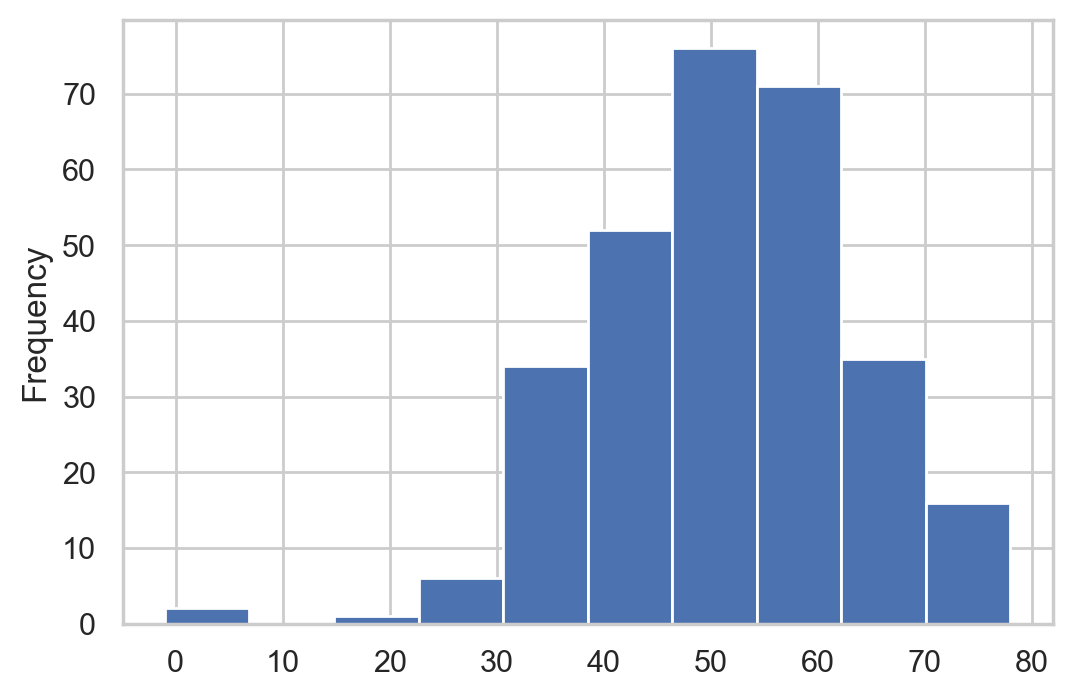

In [78]:
can_reps_with_age.new_age.plot.hist()

In [79]:
can_reps_with_age.new_age.min()

-1.0

In [80]:
idx = can_reps_with_age[can_reps_with_age.new_age == -1].index
idx

Int64Index([127, 212], dtype='int64')

In [81]:
import numpy as np

can_reps_with_age.loc[idx, 'age'] = np.NaN
can_reps_with_age.loc[idx, 'new_age'] = np.NaN

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


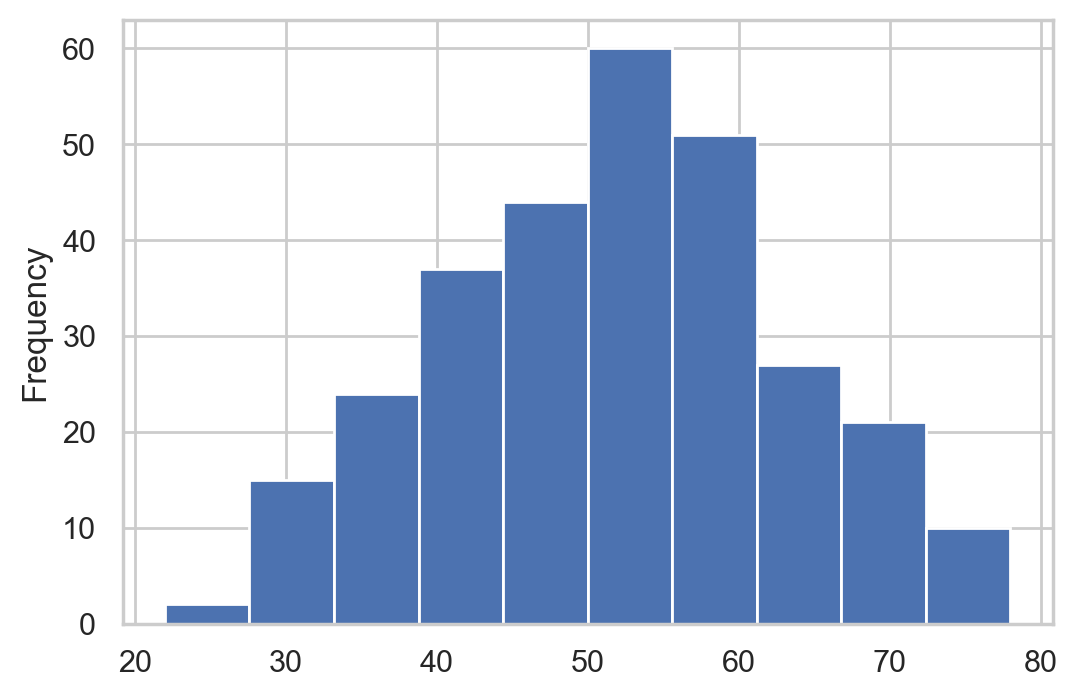

In [82]:
can_reps_with_age.new_age.plot.hist()

In [83]:
can_reps_with_age.new_age.min()

22.0

In [84]:
can_reps_with_age[can_reps_with_age.new_age == 22.0]

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,new_age
161,,Eric Melillo,/wiki/Eric_Melillo,Conservative,None,Kenora,/wiki/Kenora_(electoral_district),22.0,22.0


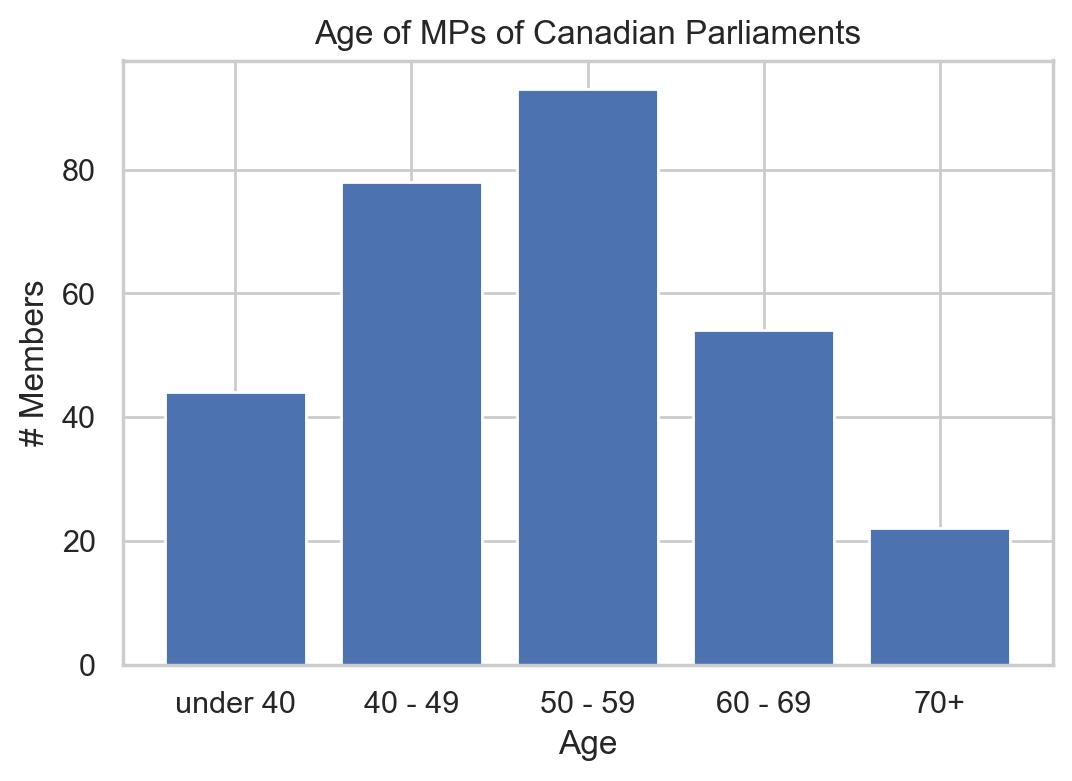

In [85]:
hist_data_ca_reps = graph_utils.graph_age_histogram(can_reps_with_age,
                                age_col='new_age',
                                y_axis_label='# Members',
                                title='Age of MPs of Canadian Parliaments')

## Canadian vs US Reps

In [86]:
for row in hist_data_us_reps:
    row['country'] = 'US'
    row['num_reps'] = row.pop('num_senators')
    
for row in hist_data_ca_reps:
    row['country'] = 'Canada'
    row['num_reps'] = row.pop('num_senators')

In [87]:
hist_rows = hist_data_us_reps + hist_data_ca_reps
hist_data = pd.DataFrame(hist_rows)
hist_data

,age_range,country,num_reps
0,under 40,US,25
1,40 - 49,US,79
2,50 - 59,US,112
3,60 - 69,US,127
4,70+,US,88
5,under 40,Canada,44
6,40 - 49,Canada,78
7,50 - 59,Canada,93
8,60 - 69,Canada,54
9,70+,Canada,22


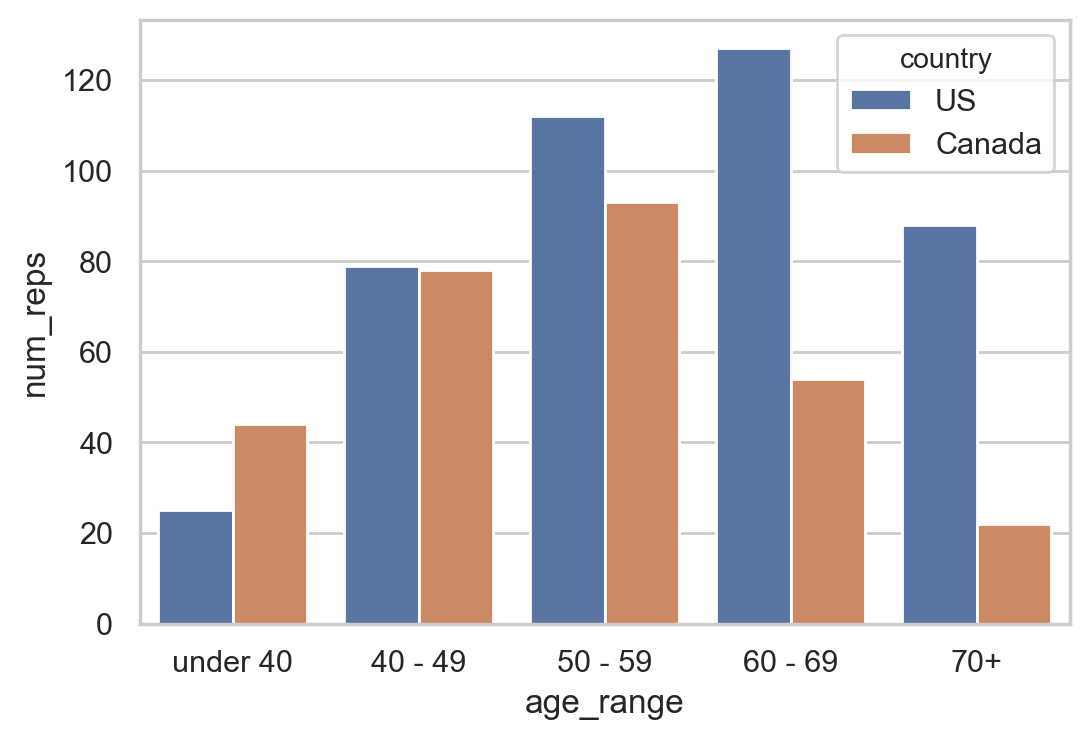

In [88]:
ax = sns.barplot(
    x='age_range',
    y='num_reps',
    hue='country',
    data=hist_data,
)

## Germany

In [89]:
path = 'data/germany/bundestag_19.parquet'
bundestag = pd.read_parquet(path)
bundestag

,Image,Name,Year of birth,Party - 1,Party - 2,State,Constituency (for directly elected members),Constituency vote percentage (for directly elected members),Remarks
0,,Michael von Abercron,1952[1],,CDU,Schleswig-Holstein,Pinneberg,39.7 %[2],
1,,Doris Achelwilm,1976[3],,The Left,Bremen,,,
2,,Grigorios Aggelidis,1965[4],,FDP,Lower Saxony,,,
3,,Gökay Akbulut,1982[5],,The Left,Baden-Württemberg,,,
4,,Stephan Albani,1968[6],,CDU,Lower Saxony,,,
...,...,...,...,...,...,...,...,...,...
704,,Stefan Zierke,1970,,SPD,Brandenburg,,,
705,,Matthias Zimmer,1961,,CDU,Hesse,Frankfurt am Main I,30.5 %[479],
706,,Jens Zimmermann,1981,,SPD,Hesse,,,
707,,Pia Zimmermann,1956,,The Left,Lower Saxony,,,


In [94]:
def parse_year_of_birth(s: str) -> int:
    return int(s[:4])

bundestag['year_of_birth_parsed'] = bundestag['Year of birth'].apply(parse_year_of_birth)

In [95]:
bundestag['est_age'] = bundestag['year_of_birth_parsed'].apply(date_utils.calculate_age_from_year)

In [96]:
bundestag

,Image,Name,Year of birth,Party - 1,Party - 2,State,Constituency (for directly elected members),Constituency vote percentage (for directly elected members),Remarks,year_of_birth_parsed,est_age
0,,Michael von Abercron,1952[1],,CDU,Schleswig-Holstein,Pinneberg,39.7 %[2],,1952,68
1,,Doris Achelwilm,1976[3],,The Left,Bremen,,,,1976,44
2,,Grigorios Aggelidis,1965[4],,FDP,Lower Saxony,,,,1965,55
3,,Gökay Akbulut,1982[5],,The Left,Baden-Württemberg,,,,1982,38
4,,Stephan Albani,1968[6],,CDU,Lower Saxony,,,,1968,52
...,...,...,...,...,...,...,...,...,...,...,...
704,,Stefan Zierke,1970,,SPD,Brandenburg,,,,1970,50
705,,Matthias Zimmer,1961,,CDU,Hesse,Frankfurt am Main I,30.5 %[479],,1961,59
706,,Jens Zimmermann,1981,,SPD,Hesse,,,,1981,39
707,,Pia Zimmermann,1956,,The Left,Lower Saxony,,,,1956,64


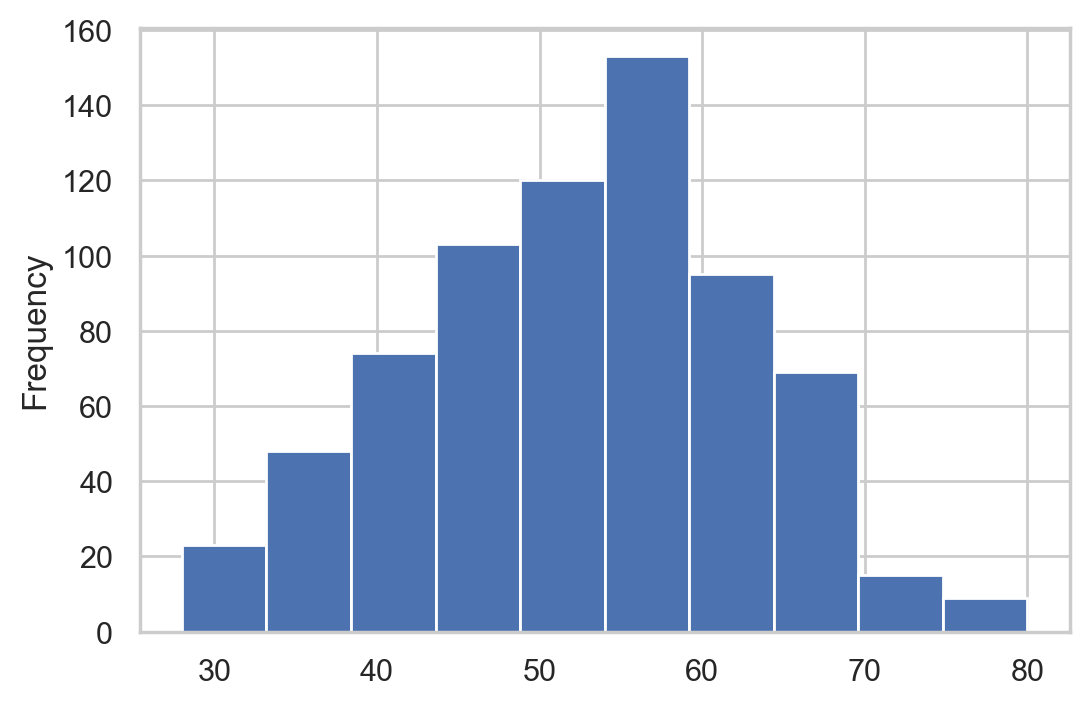

In [97]:
bundestag.est_age.plot.hist()

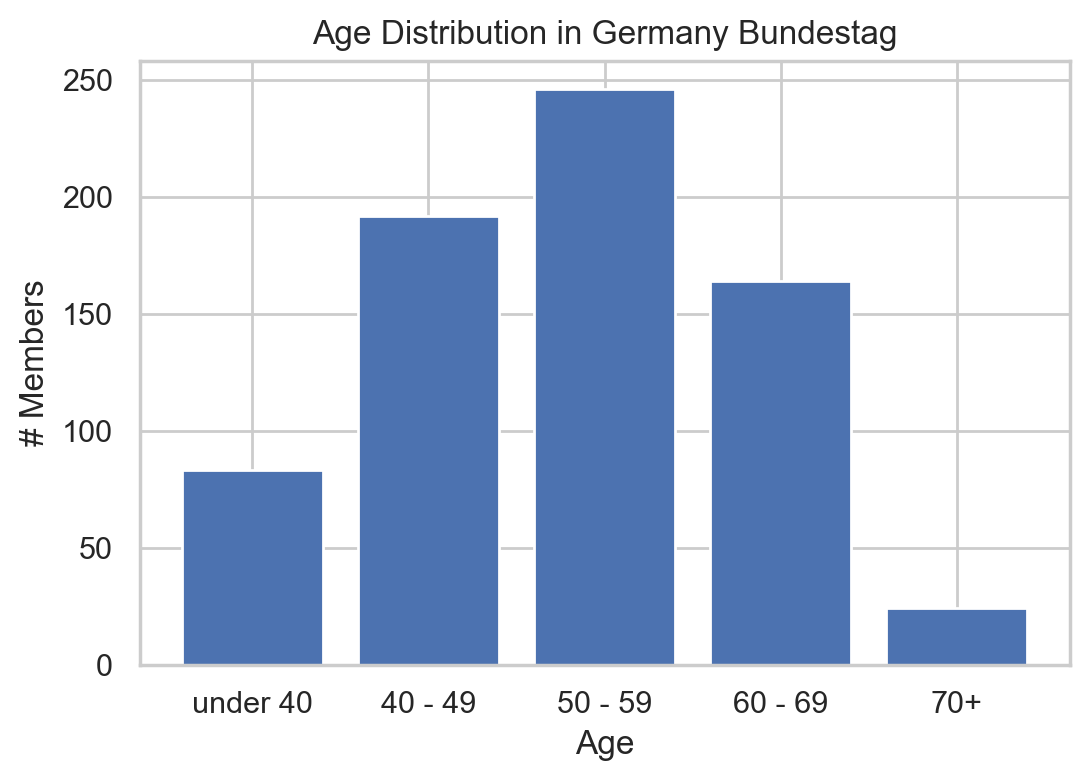

[{'age_range': 'under 40', 'num_senators': 83},
 {'age_range': '40 - 49', 'num_senators': 192},
 {'age_range': '50 - 59', 'num_senators': 246},
 {'age_range': '60 - 69', 'num_senators': 164},
 {'age_range': '70+', 'num_senators': 24}]

In [98]:
graph_utils.graph_age_histogram(bundestag,
                                title='Age Distribution in Germany Bundestag',
                                age_col='est_age',
                                y_axis_label='# Members'
                                )

## UK

In [103]:
path = 'data/uk/parliament_2019.parquet'
uk = pd.read_parquet(path)
uk

,Constituency,Constituency_link,Party of incumbentbefore election - 1,Party of incumbentbefore election - 2,Party of incumbentbefore election - 2_link,Member returned,Member returned_link_1,Member returned_link_2,Party of incumbentafter election - 1,Party of incumbentafter election - 2,Party of incumbentafter election - 2_link,Notes,Party of incumbentbefore election - 2_link_1,Party of incumbentbefore election - 2_link_2,Notes_link,Member returned_link,Party of incumbentbefore election - 2_link_3,Party of incumbentafter election - 2_link_1,Party of incumbentafter election - 2_link_2
0,Aberavon,/wiki/Aberavon_(UK_Parliament_constituency),,Labour,/wiki/Labour_Party_(UK),Stephen Kinnock,/wiki/File:Official_portrait_of_Stephen_Kinnoc...,/wiki/Stephen_Kinnock,,Labour,/wiki/Labour_Party_(UK),Seat held,None,None,None,None,None,None,None
1,Aberconwy,/wiki/Aberconwy_(UK_Parliament_constituency),,Independent[f],None,Robin Millar,/wiki/File:Official_portrait_of_Robin_Millar_M...,/wiki/Robin_Millar_(politician),,Conservative,/wiki/Conservative_Party_(UK),"Previous incumbent, Guto Bebb, did not stand",/wiki/Independent_politician,#cite_note-fnC-14,/wiki/Guto_Bebb,None,None,None,None
2,Aberdeen North,/wiki/Aberdeen_North_(UK_Parliament_constituency),,Scottish National,/wiki/Scottish_National_Party,Kirsty Blackman,/wiki/File:Official_portrait_of_Kirsty_Blackma...,/wiki/Kirsty_Blackman,,Scottish National,/wiki/Scottish_National_Party,Seat held,None,None,None,None,None,None,None
3,Aberdeen South,/wiki/Aberdeen_South_(UK_Parliament_constituency),,Conservative,/wiki/Conservative_Party_(UK),Stephen Flynn,None,None,,Scottish National,/wiki/Scottish_National_Party,"Previous incumbent, Ross Thomson, did not stand",None,None,/wiki/Ross_Thomson,/wiki/Stephen_Flynn_(Scottish_politician),None,None,None
4,Airdrie and Shotts,/wiki/Airdrie_and_Shotts_(UK_Parliament_consti...,,Scottish National,/wiki/Scottish_National_Party,Neil Gray,/wiki/File:Official_portrait_of_Neil_Gray_MP_c...,/wiki/Neil_Gray,,Scottish National,/wiki/Scottish_National_Party,Seat held,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Yeovil,/wiki/Yeovil_(UK_Parliament_constituency),,Conservative,/wiki/Conservative_Party_(UK),Marcus Fysh,/wiki/File:Official_portrait_of_Mr_Marcus_Fysh...,/wiki/Marcus_Fysh,,Conservative,/wiki/Conservative_Party_(UK),Seat held,None,None,None,None,None,None,None
647,Ynys Môn,/wiki/Ynys_M%C3%B4n_(UK_Parliament_constituency),,Labour,/wiki/Labour_Party_(UK),Virginia Crosbie,/wiki/File:Virginia_Crosbie.jpg,/wiki/Virginia_Crosbie,,Conservative,/wiki/Conservative_Party_(UK),"Previous incumbent, Albert Owen, did not stand",None,None,/wiki/Albert_Owen,None,None,None,None
648,York Central,/wiki/York_Central_(UK_Parliament_constituency),,Labour Co-operative,/wiki/Labour_Co-operative,Rachael Maskell,/wiki/File:Official_portrait_of_Rachael_Maskel...,/wiki/Rachael_Maskell,,Labour Co-operative,/wiki/Labour_Co-operative,Seat held,None,None,None,None,None,None,None
649,York Outer,/wiki/York_Outer_(UK_Parliament_constituency),,Conservative,/wiki/Conservative_Party_(UK),Julian Sturdy,/wiki/File:Official_portrait_of_Julian_Sturdy_...,/wiki/Julian_Sturdy,,Conservative,/wiki/Conservative_Party_(UK),Seat held,None,None,None,None,None,None,None


In [105]:
uk['Party of incumbentbefore election - 2'].unique()

array(['Labour', 'Independent[f]', 'Scottish National', 'Conservative',
       'Plaid Cymru', 'Independent (The Independents)[g]', 'Vacant[h]',
       'Liberal Democrats', 'Labour Co-operative', 'DUP', 'Sinn Féin',
       'Birkenhead Social Justice[h]', 'Liberal Democrats[f]',
       'Liberal Democrats[i]', 'Green', 'Change UK[f]', 'Vacant[j]',
       'Independent[h]', 'Speaker[h]', 'Change UK[h]', 'Change UK[g]',
       'Suspended[h]', 'Independent[g]', 'Liberal Democrats[g]',
       'Independent', 'Liberal Democrats[h]', None], dtype=object)

In [106]:
# fill in the links

def get_mp_link(row) -> str:
    if row['Member returned_link_2']:
        return row['Member returned_link_2']
    else:
        return row['Member returned_link']


uk['mp_link'] = uk.apply(get_mp_link, axis=1)

In [107]:
uk[pd.isna(uk['mp_link'])]

,Constituency,Constituency_link,Party of incumbentbefore election - 1,Party of incumbentbefore election - 2,Party of incumbentbefore election - 2_link,Member returned,Member returned_link_1,Member returned_link_2,Party of incumbentafter election - 1,Party of incumbentafter election - 2,Party of incumbentafter election - 2_link,Notes,Party of incumbentbefore election - 2_link_1,Party of incumbentbefore election - 2_link_2,Notes_link,Member returned_link,Party of incumbentbefore election - 2_link_3,Party of incumbentafter election - 2_link_1,Party of incumbentafter election - 2_link_2,mp_link
650,Source:[10],#cite_note-21,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
